## Importing the libraries

In [1]:
import pandas as pd
import numpy as np

## Importing the data

In [2]:
train_df = pd.read_csv('/Users/neeraanand/mnist_train_small.csv')

In [3]:
test_df = pd.read_csv('/Users/neeraanand/mnist_test.csv')

In [4]:
train_df.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_df.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Extracting the features

In [6]:
x_train = train_df.drop(['6'], axis=1).values

In [7]:
print(x_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
print(x_train.shape)

(19999, 784)


In [9]:
x_test = test_df.drop(index = 1942, columns='7').values

In [10]:
print(x_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Visualizing the data

In [11]:
%matplotlib inline

In [12]:
import matplotlib
import matplotlib.pyplot as plt

In [13]:
any_digit = x_train[0]
any_digit_image = any_digit.reshape(28, 28)

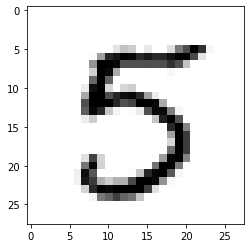

In [14]:
plt.imshow(any_digit_image, cmap = matplotlib.cm.binary, interpolation = 'nearest')

## Extracting the labels

In [15]:
y_train = train_df['6'].values

In [16]:
print(y_train)

[5 7 9 ... 2 9 5]


In [17]:
print(y_train[0])

5


In [18]:
m = len(y_train) ## Number of examples of the training set

In [19]:
print(m)

19999


In [20]:
y_test = test_df['7'].drop(1942).values

In [21]:
m1 = len(y_test) ## Number of the examples of the test sets

In [22]:
print(m1)

1942


## Adding bias term to train and test set

In [23]:
x_train = np.hstack((np.ones((m, 1)), x_train))

In [24]:
print(x_train)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [25]:
x_test = np.hstack((np.ones((len(x_test), 1)), x_test))

In [26]:
print(x_test)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


## Normalising the features of test and train sets

In [27]:
x_train = x_train/255 ## As highest values is 255 and lowest is 0

In [28]:
x_test = x_test/255

## Defining the hypothesis and cost function

In [29]:
def computeCost(x, y, theta):
    
    hypothesis = x.dot(theta) ## Calculating the hypothesis function
    
    errors = np.subtract(hypothesis, y)
    
    sqrErrors = np.square(errors)
    
    J = 1/(2*m)*errors.T.dot(errors) ## Calculating the cost function
    
    return J

## Defining the gradient_descent function and updating theta

In [30]:
def gradient_descent(x, y, theta, learning_rate, iterations):
    
    cost_hist = np.zeros(iterations)
    
    for i in range(iterations):
        
        hypothesis = x.dot(theta)
        
        errors = np.subtract(hypothesis, y)
        
        alpha = (learning_rate/m)*x.transpose().dot(errors)
        
        theta = theta- alpha ## Updating the parameters theta
        
        cost_hist[i] = computeCost(x, y, theta)
        
    return theta, cost_hist

## Initialising the parameters

In [31]:
theta = np.zeros(x_train.shape[1])
iterations = 10000
learning_rate= 0.0408

In [32]:
theta, cost_hist = gradient_descent(x_train, y_train, theta, learning_rate, iterations)
print("The optimised values of theta are: ", theta)

The optimised values of theta are:  [ 2.62902526e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.34767205e-03 -2.91097163e-02 -2.91097163e-02
 -1.21290484e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  6.41768544e-02
  1.08156489e-01  1.11514546e-01  9.76902952e-02  5.95741072e-02
 -3.22371520e-02  8.09263811e-02  4.29923962e-02  1.07561618e-01
  1.60472183e-01  1.28074815e-01  8.00627465e-02  1.24233065e-01
  5.76313126e-02  4.88412332e-02  3.96311245e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00

## Calculating the mean squared error

In [33]:
Loss = computeCost(x_train, y_train, theta)
print(Loss)

1.825812836101735


## Displaying the predicted values for the train set

In [34]:
hypothesis =  np.round(x_train.dot(theta)) ## Using the train set

y_orig = y_train

df = pd.DataFrame(columns = ['predicted_target', 'Original_target'])

df['predicted_target'] = hypothesis

df['Original_target'] = y_orig

df.head(10)

,predicted_target,Original_target
0,5.0,5
1,2.0,7
2,8.0,9
3,4.0,5
4,3.0,2
5,1.0,0
6,4.0,6
7,6.0,5
8,6.0,5
9,7.0,2


In [35]:
from sklearn.metrics import accuracy_score
print("Accuracy :", accuracy_score(y_orig, hypothesis)) ## For the train set

Accuracy : 0.24826241312065603


## Displaying the predicted values for the test set

In [36]:
hypothesis = np.round(x_test.dot(theta))

y_orig = y_test

df = pd.DataFrame(columns = ['Predicted_target', 'Original_target'])
df['Predicted_target'] = hypothesis
df['Original_target'] = y_test
df.head()

,Predicted_target,Original_target
0,2.0,2
1,1.0,1
2,1.0,0
3,3.0,4
4,1.0,1


In [37]:
from sklearn.metrics import accuracy_score
print("Accuracy :", accuracy_score(y_orig, hypothesis)) ## For the test set

Accuracy : 0.2420185375901133


Text(0.5, 1.0, 'Convergence of gradient descent')

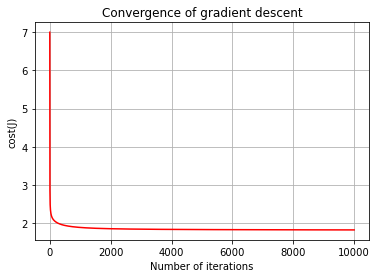

In [38]:
import matplotlib.pyplot as plt
plt.plot(range(1, iterations+1), cost_hist, color='red')
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost(J)")
plt.title("Convergence of gradient descent")